<a href="https://colab.research.google.com/github/SaijyotiTripathy/Data-Analysis-with-Python/blob/main/Sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df= pd.read_csv("/content/sales_data.csv", parse_dates=["Date"])
# parse_dates parameter used to convince pandas to turn things into real datetime types.

# **The Data at a Glance**

In [ ]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
# rows and columns of dataframe
df.shape

(113036, 18)

In [ ]:
# properties of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [ ]:
# statistical properties of data
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# **Numerical Analysis and Evaluation**

We will analyse the *Unit_Cost* column

In [ ]:
df['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
df['Unit_Cost'].mean()

267.296365759581

In [ ]:
df['Unit_Cost'].median()

9.0

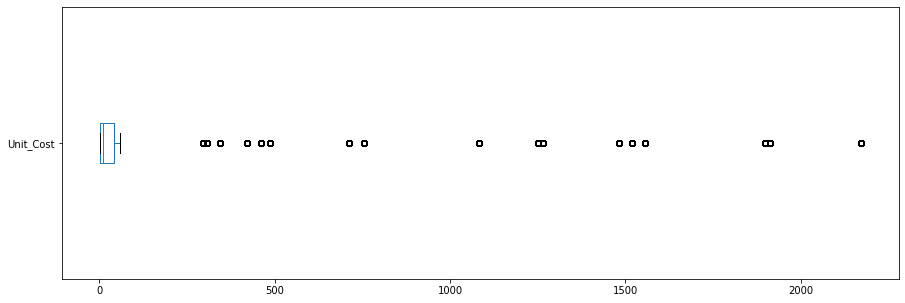

In [ ]:
# whiskers(line extending from the box) shows quartiles, points-- shows outliers

df['Unit_Cost'].plot(kind='box', vert=False, figsize=(15,5))

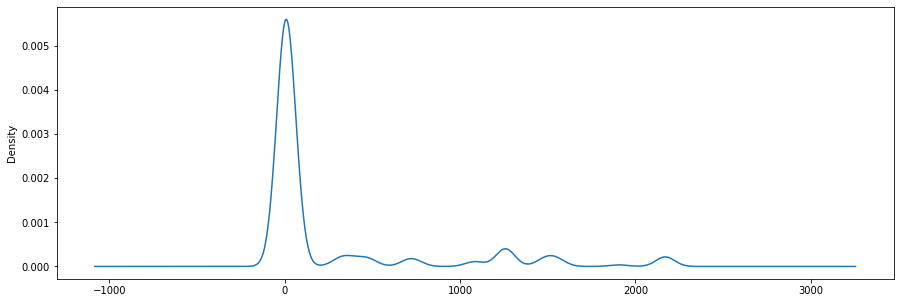

In [ ]:
# shows distribution of numerical variable Unit_Cost

df['Unit_Cost'].plot(kind='density', figsize=(15,5))

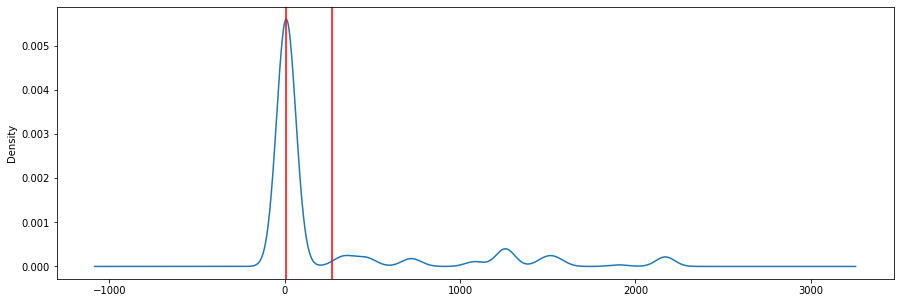

In [ ]:
# points out mean and median in the density distribution 

ax= df['Unit_Cost'].plot(kind='density', figsize=(15,5))
ax.axvline(df['Unit_Cost'].mean(), color='red')
ax.axvline(df['Unit_Cost'].median(), color='red')

Text(0.5, 0, 'Dollars')

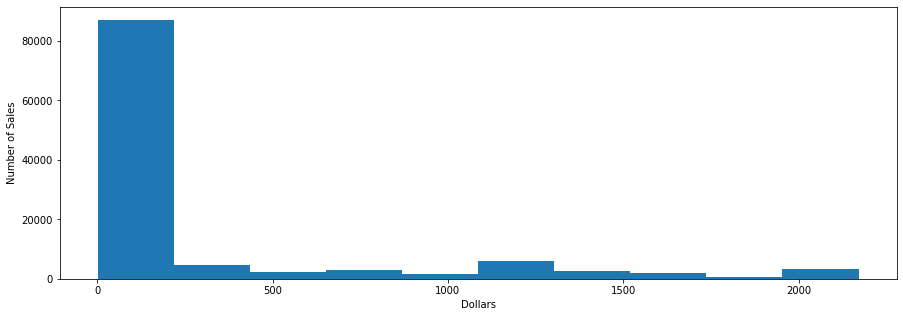

In [ ]:
# plots histogram 

ax= df['Unit_Cost'].plot(kind='hist', figsize=(15,5))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

# **Categorical Analysis and Visualization**

We will analyse the *Age_Group* column

In [ ]:
# counts of the categories
df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

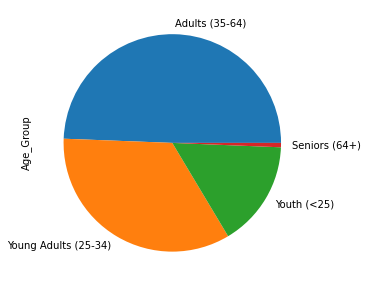

In [ ]:
# plots pie chart

df['Age_Group'].value_counts().plot(kind='pie', figsize=(15,5))

Text(0, 0.5, 'Number of Sales')

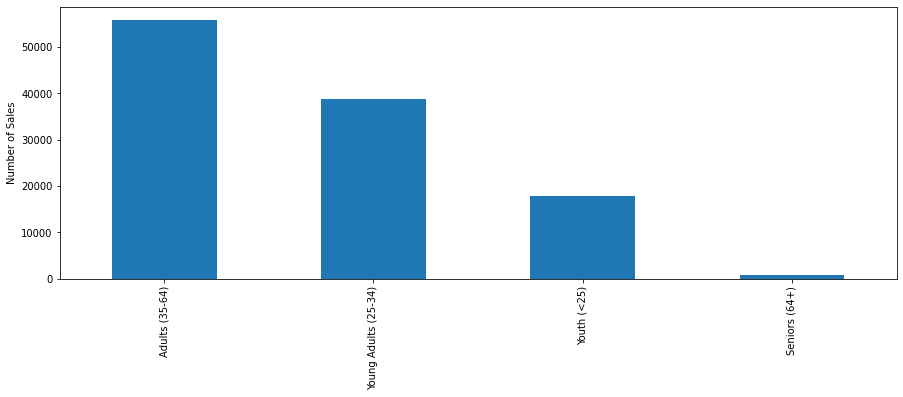

In [ ]:
# plots bar chart

ax= df['Age_Group'].value_counts().plot(kind='bar', figsize=(15,5))
ax.set_ylabel('Number of Sales')

# **Relationship between columns**

In [ ]:
# correlation between properties
corr= df.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


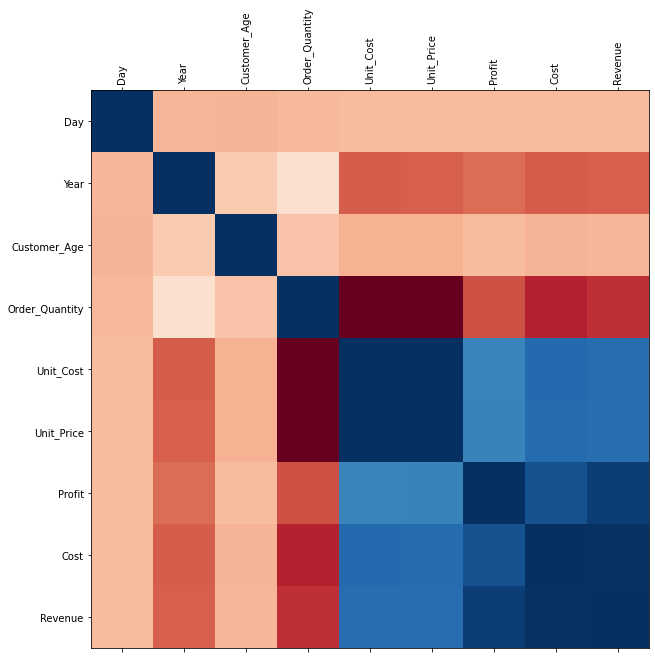

In [ ]:
# plots correlation matrix --- Blue (high correlation) --- Red (low correlation)

fig= plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

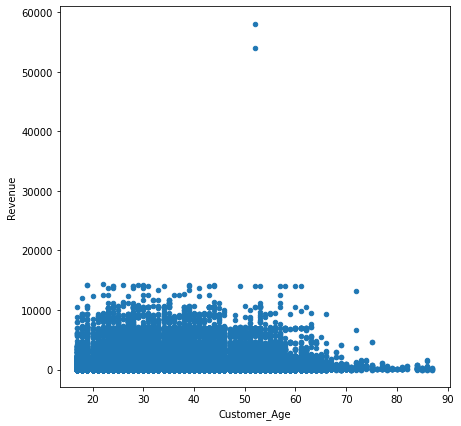

In [ ]:
# plots scatter plot for age and revenue

df.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(7,7))

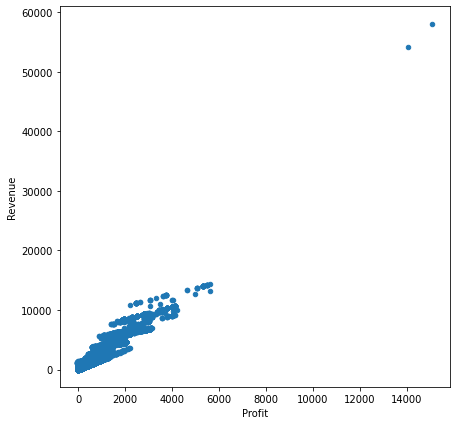

In [ ]:
# plots scatter plot for profit and revenue

df.plot(kind='scatter', x='Profit', y='Revenue', figsize=(7,7))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Profit')

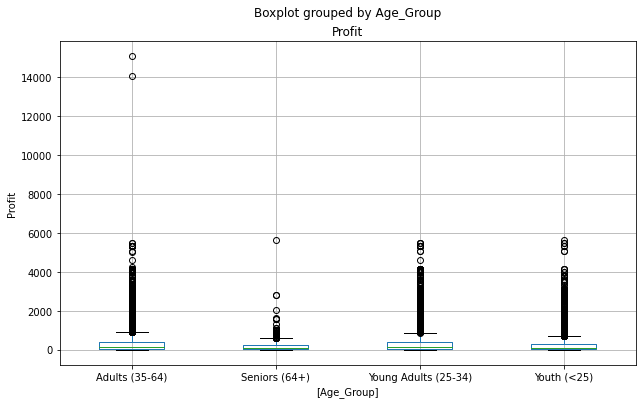

In [ ]:
# understanding profit per Age Group

ax= df[['Profit','Age_Group']].boxplot(by='Age_Group',figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

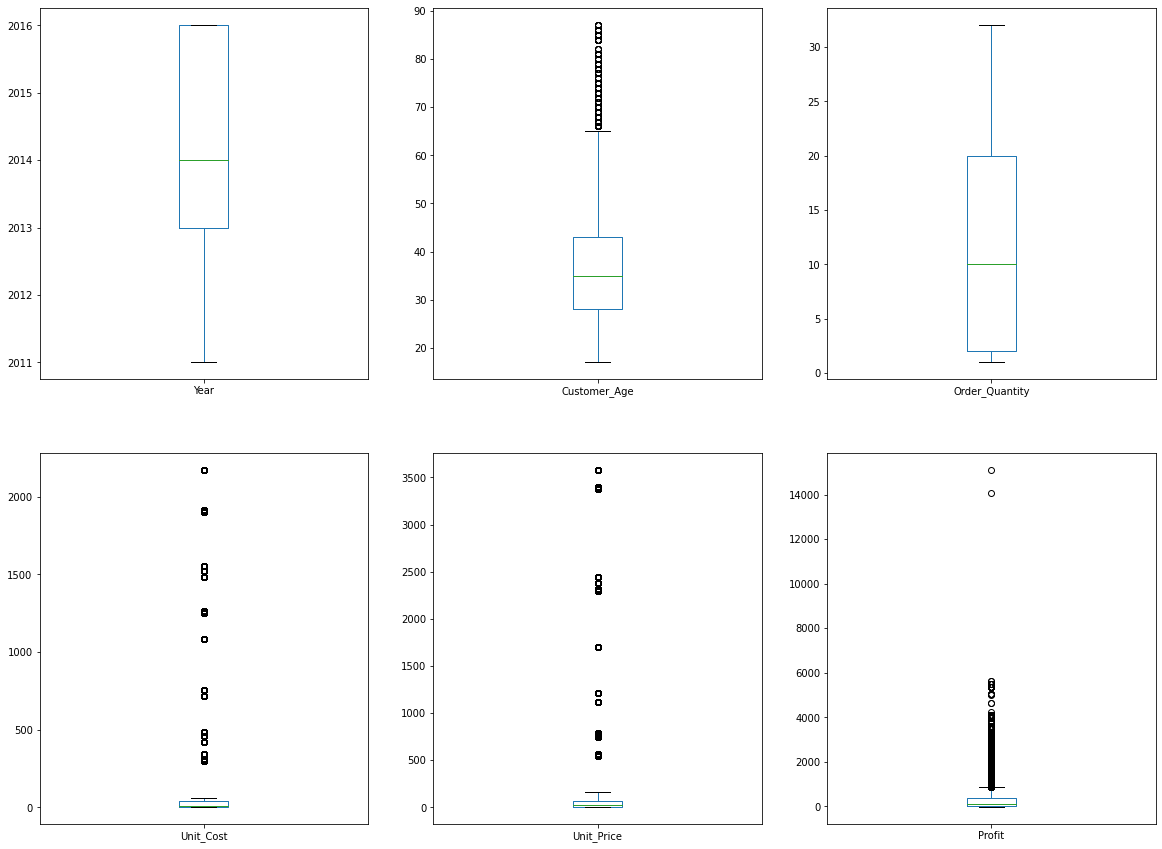

In [ ]:
# grid os boxplots

boxplot_cols= ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
df[boxplot_cols].plot(kind='box',subplots=True, layout=(2,3), figsize=(20,15))

# **Column Wrangling**
We can create new columns and modify existing columns.

Add and calculate a new *Revenue_per_Age* column

In [ ]:
df['Revenue_per_Age']= df['Revenue']/ df['Customer_Age']
df['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

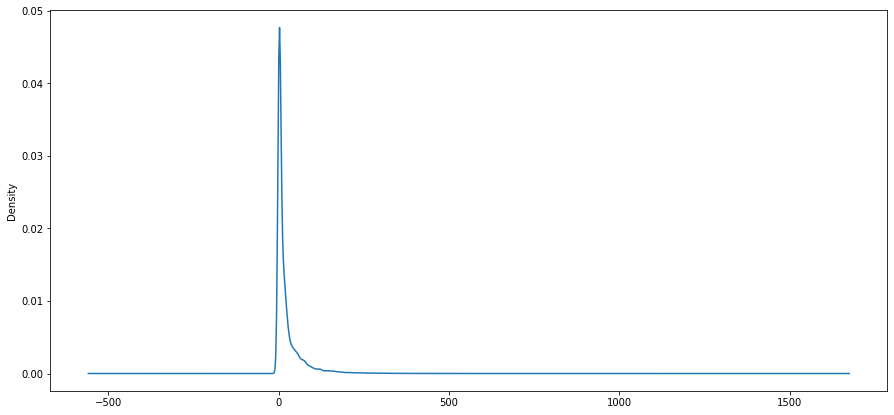

In [ ]:
df['Revenue_per_Age'].plot(kind='density', figsize=(15,7))

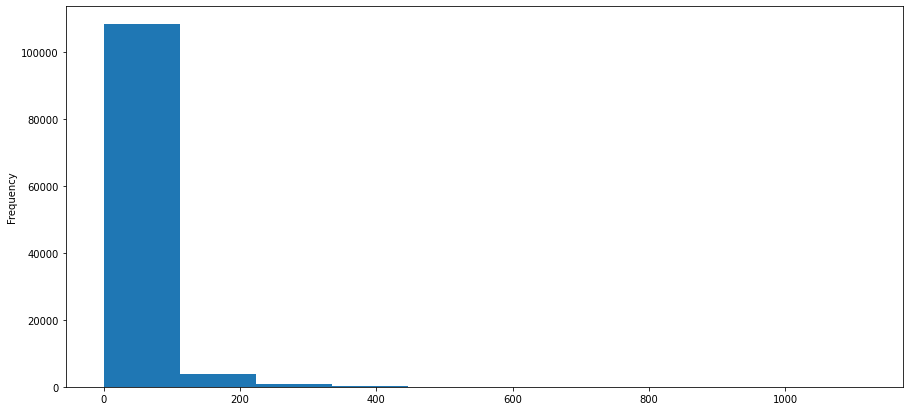

In [ ]:
df['Revenue_per_Age'].plot(kind='hist', figsize=(15,7))

Add and calculate a new *Calculated_Cost* column

Formula :  *Calculated_Cost= Order_Quantity X Unit_Cost* 

In [ ]:
df['Calculated_Cost']= df['Order_Quantity'] * df['Unit_Cost']
df['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [ ]:
# Number of points where the Cost given in dataset and Actual cost calculated are different
(df['Calculated_Cost'] != df['Cost']).sum()

0

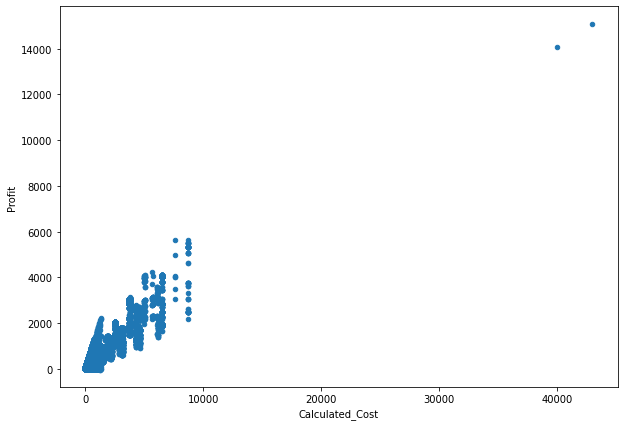

In [ ]:
# relationship between Cost and Profit
df.plot(kind='scatter',x='Calculated_Cost',y='Profit', figsize=(10,7))

Add and calculate a new *Calculated_Revenue* column

Formula : *Calculated_Revenue = Cost + Profit*

In [ ]:
df['Calculated_Revenue']= df['Cost'] + df['Profit']
df['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [ ]:
# Number of points where the Revenue given in dataset and Actual revenue calculated are different

(df['Calculated_Revenue'] != df['Revenue']).sum()

0

In [ ]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


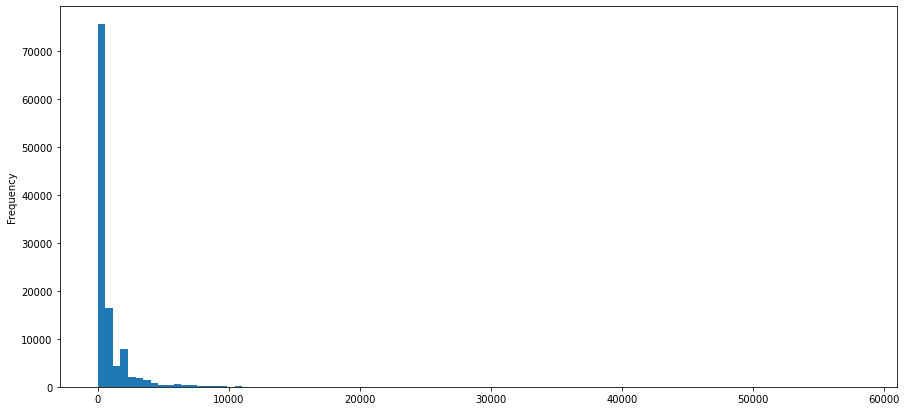

In [ ]:
df['Revenue'].plot(kind='hist', bins=100, figsize=(15,7))

Modify all *Unit_Price* values adding 3% tax to them

In [ ]:
df['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [ ]:
# df['Unit_Price'] = df['Unit_Price'] + df['Unit_Price']*(0.3)

df['Unit_Price'] *= 1.03
df['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

# **Selection and Indexing**

Get all the cells made in the state of *Kentucky*

In [ ]:
# loc method allows you to access a group of rows and columns by supplying label(s) arguments.

df.loc[df['State']== 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


Get the mean revenue of the *Adults (35-64)* sales group

In [ ]:
df.loc[df['Age_Group']== 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

How many records belong to Age Group *Youth (<25)* or *Adults (35-64)* ?

In [ ]:
# shape[0] = number of rows ; shape[1] = number of columns

df.loc[(df['Age_Group']=='Youth (<25)') | (df['Age_Group']=='Adults (35-64)')].shape[0]

73652

Get the mean revenue of the sales group *Adults (35-64)* in *United States*

---



In [ ]:
df.loc[(df['Age_Group']== 'Adults (35-64)') & (df['Country']== 'United States'), 'Revenue'].mean()

726.7260473588342

Increase the revenue by 10% to every sale made in France


In [ ]:
df.loc[df['Country']== 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
df.loc[df['Country']== 'France', 'Revenue'] *= 1.1
df.loc[df['Country']== 'France', 'Revenue'].head()

50     952.27
51     952.27
52    3577.97
53    3449.71
60     757.46
Name: Revenue, dtype: float64